In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Question - 1

In [146]:
lst = [18, 22, 25, 27, 42, 43]
lstt = [[i] for i in lst]
data = pd.Series(lst)
data

0    18
1    22
2    25
3    27
4    42
5    43
dtype: int64

In [149]:
def calc_proximity(data, iter=3):
    n = data.shape[0]
    centers = [i for i in range(n)]
    mat = np.zeros(shape=(n,n))
    for i in range(n):
        mat[i, :] = abs(data - data[i])
        
    df = pd.Series([[i] for i in data])
    print(mat)
    for counter in range(iter):
        idx = np.argmin(np.where(mat != 0, mat, np.inf))
        i, j = idx % n, idx // n
        print(i, j)
        # print(df)
        df[i] = df[i] + df[j]
        df = df.drop(j).reset_index(drop=True)

        for i_ in range(n):
            mat[i_, i] = min(mat[i_, i], mat[i_, j])
            mat[i, i_] = min(mat[i, i_], mat[j, i_])
        
        mat = np.delete(mat, j, axis=0)
        mat = np.delete(mat, j, axis=1)
        n -= 1
        # print(mat)
    return mat, df
    
mat, c = calc_proximity(data, iter=4)
print("Final Proximity Matrix:\n", mat)
print("Final Clusters:\n", c)

[[ 0.  4.  7.  9. 24. 25.]
 [ 4.  0.  3.  5. 20. 21.]
 [ 7.  3.  0.  2. 17. 18.]
 [ 9.  5.  2.  0. 15. 16.]
 [24. 20. 17. 15.  0.  1.]
 [25. 21. 18. 16.  1.  0.]]
5 4
3 2
2 1
1 0
Final Proximity Matrix:
 [[ 0. 15.]
 [15.  0.]]
Final Clusters:
 0    [27, 25, 22, 18]
1            [43, 42]
dtype: object


In [31]:
mat = np.where(mat != 0, mat, np.inf)

# Question - 2

In [92]:
df = pd.read_csv('data.csv')
df

,point,x,y
0,p1,1,1
1,p2,3,2
2,p3,9,1
3,p4,3,7
4,p5,7,2
5,p6,9,7
6,p7,4,8
7,p8,8,3
8,p9,1,4


In [99]:
data = df.values
data

array([['p1', 1, 1],
       ['p2', 3, 2],
       ['p3', 9, 1],
       ['p4', 3, 7],
       ['p5', 7, 2],
       ['p6', 9, 7],
       ['p7', 4, 8],
       ['p8', 8, 3],
       ['p9', 1, 4]], dtype=object)

In [139]:
def calc_proximity_2d(data, iter=3, linkage='single', metric='euclidean'):
    n = data.shape[0]
    
    mat = np.zeros(shape=(n,n))
    for i in range(n):
        if metric == 'euclidean':
            mat[i, :] = np.apply_along_axis(np.sum, 1, (data[:, 1:] - data[i, 1:])**2)**.5
        elif metric == 'manhattan':
            mat[i, :] = np.apply_along_axis(np.sum, 1, abs(data[:, 1:] - data[i, 1:]))
        else:
            mat[i, :] = np.apply_along_axis(np.sum, 1, abs(data[:, 1:] - data[i, 1:])**3)**(1/3)
        
    df = pd.Series([[i] for i in data])
    # print(mat)
    for counter in range(iter):
        idx = np.argmin(np.where(mat != 0, mat, np.inf))
        i, j = idx % n, idx // n
        print(i, j)
        #print(df)
        n_i, n_j = len(df[i]), len(df[j])

        df[i] = df[i] + df[j]
        df = df.drop(j).reset_index(drop=True)

        for i_ in range(n):
            if linkage == 'single':
                mat[i_, i] = min(mat[i_, i], mat[i_, j])
                mat[i, i_] = min(mat[i, i_], mat[j, i_])
            
            elif linkage == 'complete':
                mat[i_, i] = max(mat[i_, i], mat[i_, j])
                mat[i, i_] = max(mat[i, i_], mat[j, i_])
            
            else:
                mat[i, i_] = mat[i_, i] = (mat[i_, i] * n_i + mat[i_, j] * n_j) / (n_i + n_j)
        mat[i][i] = 0
            
        mat = np.delete(mat, j, axis=0)
        mat = np.delete(mat, j, axis=1)
        n -= 1
    return mat, df
mat, c = calc_proximity_2d(data, iter=6, linkage='complete')

print("Mat:\n", mat)
print("Centers:\n", c)

6 3
6 3
1 0
4 1
4 0
1 0
Mat:
 [[ 0.          8.60232527 10.        ]
 [ 8.60232527  0.          8.54400375]
 [10.          8.54400375  0.        ]]
Centers:
 0    [[p7, 4, 8], [p4, 3, 7], [p6, 9, 7]]
1    [[p8, 8, 3], [p5, 7, 2], [p3, 9, 1]]
2    [[p9, 1, 4], [p2, 3, 2], [p1, 1, 1]]
dtype: object


# Question - 3

####################################################################################################
Using euclidean distance metric:

6 3
6 3
1 0
4 1
4 0
3 1


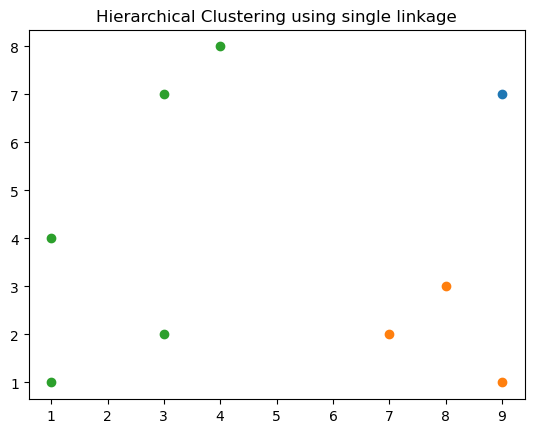

Final Proximity Matrix:
 [[0.         4.12310563 5.09901951]
 [4.12310563 0.         4.        ]
 [5.09901951 4.         0.        ]] 


6 3
6 3
1 0
4 1
4 0
1 0


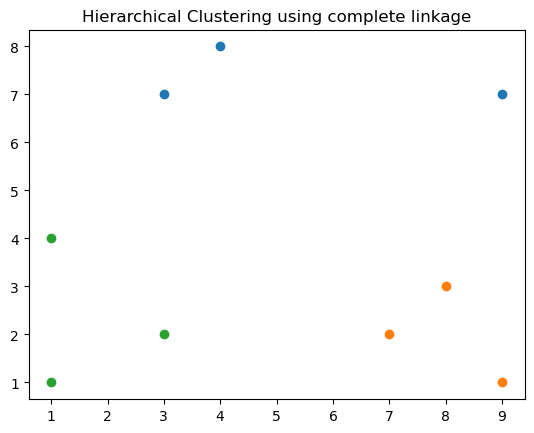

Final Proximity Matrix:
 [[ 0.          8.60232527 10.        ]
 [ 8.60232527  0.          8.54400375]
 [10.          8.54400375  0.        ]] 


6 3
6 3
1 0
4 1
4 0
2 0


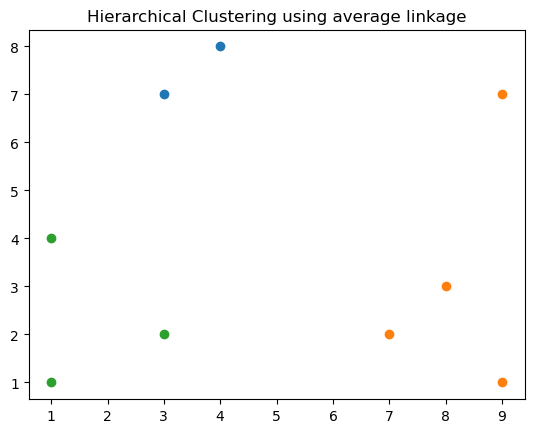

Final Proximity Matrix:
 [[0.         6.76302535 5.60477371]
 [6.76302535 0.         7.0698779 ]
 [5.60477371 7.0698779  0.        ]] 


####################################################################################################
Using manhattan distance metric:

6 3
6 3
1 0
5 0
3 0
3 2


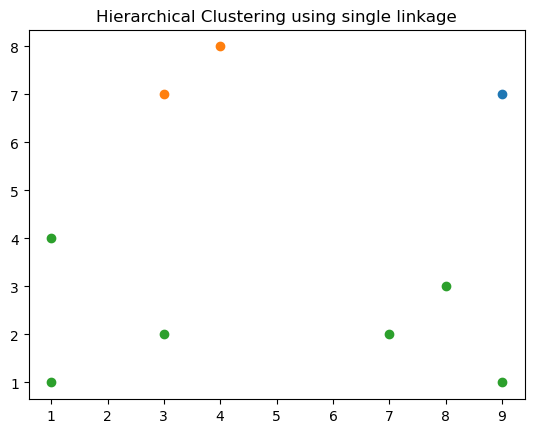

Final Proximity Matrix:
 [[0. 6. 5.]
 [6. 0. 5.]
 [5. 5. 0.]] 


6 3
6 3
1 0
4 1
4 0
1 0


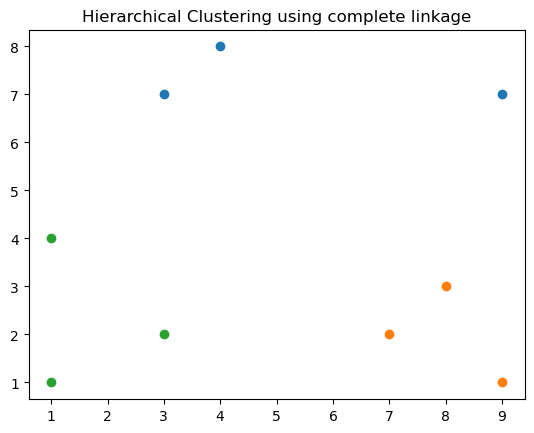

Final Proximity Matrix:
 [[ 0. 12. 14.]
 [12.  0. 11.]
 [14. 11.  0.]] 


6 3
6 3
1 0
4 1
4 0
1 0


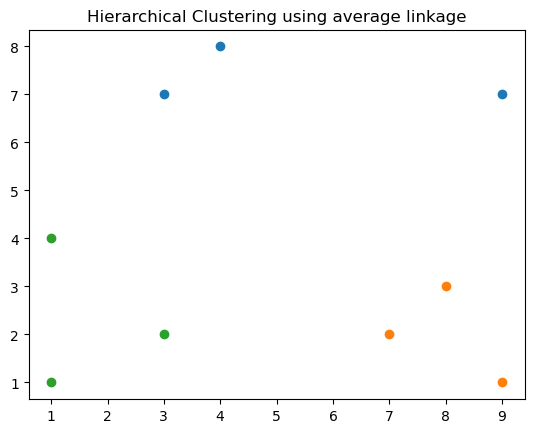

Final Proximity Matrix:
 [[0.         8.66666667 8.66666667]
 [8.66666667 0.         7.55555556]
 [8.66666667 7.55555556 0.        ]] 


####################################################################################################
Using minkowski distance metric:

6 3
6 3
1 0
4 1
4 0
3 1


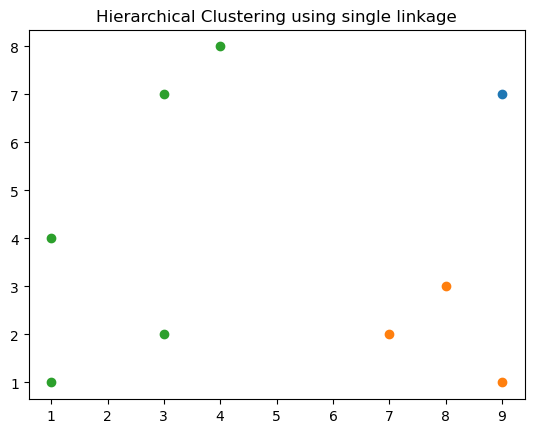

Final Proximity Matrix:
 [[0.         4.02072576 5.01329793]
 [4.02072576 0.         4.        ]
 [5.01329793 4.         0.        ]] 


6 3
6 3
1 0
4 1
4 0
1 0


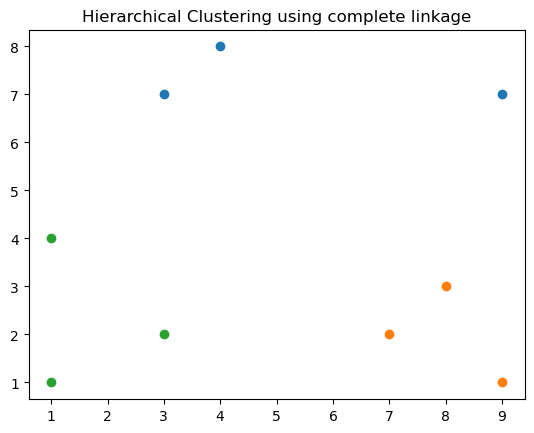

Final Proximity Matrix:
 [[0.         7.76393608 8.99588289]
 [7.76393608 0.         8.13822304]
 [8.99588289 8.13822304 0.        ]] 


6 3
6 3
1 0
4 1
4 0
2 0


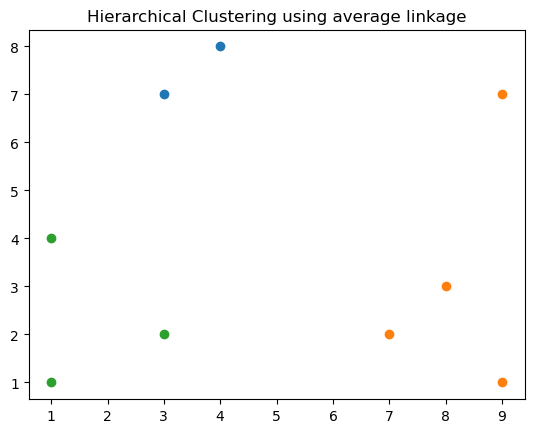

Final Proximity Matrix:
 [[0.         6.22417405 5.33841418]
 [6.22417405 0.         6.78537192]
 [5.33841418 6.78537192 0.        ]] 




In [145]:
linkage_types = ['single', 'complete', 'average']
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

for distance_metric in distance_metrics:
    print("#"*100)
    print(f"Using {distance_metric} distance metric:\n")
    for linkage_type in linkage_types:
        mat, c = calc_proximity_2d(data, iter=6, linkage=linkage_type, metric=distance_metric)
        fig = plt.figure()
        plt.title(f"Hierarchical Clustering using {linkage_type} linkage")
        for i in range(len(c)):
            plt.scatter([i for _, i, j in c[i]], [j for _, i, j in c[i]])
        plt.show()
        print("Final Proximity Matrix:\n", mat, "\n\n")